In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'E:\Data Science Projects\Datasets\Updated_datasets\naukri_data.csv')

In [3]:
df.head(4)

,company,education,industry,jobdescription,jobid,joblocation_address,jobtitle,numberofpositions,site_name,skills,min_pay,max_pay,min_exp,max_exp,avg_expereince,avg_payrate,day,month,year
0,MM Media Pvt Ltd,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,Media / Entertainment / Internet,Job Description Send me Jobs like this Quali...,210516002263,Chennai,Walkin Data Entry Operator (night Shift),NaN,NaN,ITES,150000.0,225000.0,0.0,1.0,0.5,187500.0,21.0,5.0,2016.0
1,find live infotech,UG: B.Tech/B.E. - Any Specialization PG:MBA/PG...,Advertising / PR / MR / Event Management,Job Description Send me Jobs like this Quali...,210516002391,Chennai,Work Based Onhome Based Part Time.,60.0,NaN,Marketing,150000.0,250000.0,0.0,0.0,0.0,200000.0,21.0,5.0,2016.0
2,Softtech Career Infosystem Pvt. Ltd,UG: Any Graduate - Any Specialization PG:Any P...,IT-Software / Software Services,Job Description Send me Jobs like this - as ...,101016900534,Bangalore,Pl/sql Developer - SQL,NaN,NaN,IT Software - Application Programming,NaN,NaN,4.0,8.0,6.0,NaN,13.0,10.0,2016.0
3,Onboard HRServices LLP,UG: Any Graduate - Any Specialization PG:CA Do...,Banking / Financial Services / Broking,Job Description Send me Jobs like this - Inv...,81016900536,"Mumbai, Bangalore, Kolkata, Chennai, Coimbator...",Manager/ad/partner - Indirect Tax - CA,NaN,NaN,Accounts,NaN,NaN,11.0,15.0,13.0,NaN,13.0,10.0,2016.0


## Perform Descriptive Statistics

In [4]:
# This is for Numeric Data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
jobid,22000.0,1.561171e+11,9.423956e+10,1.011600e+10,6.121650e+10,1.602169e+11,2.502166e+11,3.112155e+11
numberofpositions,4464.0,4.511694e+01,1.861972e+02,1.000000e+00,2.000000e+00,4.000000e+00,1.000000e+01,2.000000e+03
min_pay,4641.0,4.493986e+05,5.509237e+05,1.500000e+01,1.500000e+05,2.500000e+05,5.000000e+05,5.500000e+06
max_pay,4940.0,7.342964e+05,7.559780e+05,1.000000e+00,3.000000e+05,5.000000e+05,9.000000e+05,8.000000e+06
min_exp,21884.0,3.600987e+00,3.100532e+00,0.000000e+00,2.000000e+00,3.000000e+00,5.000000e+00,2.600000e+01
max_exp,21884.0,7.117803e+00,3.923900e+00,0.000000e+00,5.000000e+00,7.000000e+00,9.000000e+00,3.000000e+01
avg_expereince,21884.0,5.359395e+00,3.444409e+00,0.000000e+00,3.000000e+00,4.500000e+00,7.000000e+00,2.800000e+01
avg_payrate,4640.0,6.149812e+05,6.442135e+05,1.750000e+01,2.500000e+05,3.750000e+05,7.500000e+05,6.500000e+06
day,21977.0,1.884993e+01,9.751744e+00,1.000000e+00,9.000000e+00,2.200000e+01,2.900000e+01,3.100000e+01
month,21977.0,7.224189e+00,4.062145e+00,1.000000e+00,3.000000e+00,8.000000e+00,1.100000e+01,1.200000e+01


In [5]:
# This is for Other Data Types
df.describe(include=['O']).T

,count,unique,top,freq
company,21996,8469,Indian Institute of Technology Bombay,403
education,20004,2355,"UG: Any Graduate - Any Specialization, Graduat...",2015
industry,21995,63,IT-Software / Software Services,9216
jobdescription,21996,21063,Job Description Send me Jobs like this Adver...,121
joblocation_address,21499,2141,Bangalore,5228
jobtitle,22000,17564,Business Development Executive,93
site_name,3987,1,www.naukri.com,3987
skills,21472,45,IT Software - Application Programming,5989


## Extract ALL the Categorical Features from the DataFrame 

In [6]:
## Find categorical variables using list comprehension

categorical = [col for col in df.columns if df[col].dtype == 'object']
print(categorical)

['company', 'education', 'industry', 'jobdescription', 'joblocation_address', 'jobtitle', 'site_name', 'skills']


In [7]:
## Find numerical variables using list comprehension

numerical = [col for col in df.columns if df[col].dtype != 'object']
print(numerical)

['jobid', 'numberofpositions', 'min_pay', 'max_pay', 'min_exp', 'max_exp', 'avg_expereince', 'avg_payrate', 'day', 'month', 'year']


In [8]:
## Find categorical variables using List

cat=[]
for col in df.columns:
    if df[col].dtype=='object':
        cat.append(col)
        
cat

['company',
 'education',
 'industry',
 'jobdescription',
 'joblocation_address',
 'jobtitle',
 'site_name',
 'skills']

In [9]:
# Find categorical variables using select_dtypes in-built function of pandas

df.select_dtypes(include='O').columns

Index(['company', 'education', 'industry', 'jobdescription',
       'joblocation_address', 'jobtitle', 'site_name', 'skills'],
      dtype='object')

In [10]:
### Find categorical variables using dictionary

[key for key in dict(df.dtypes) if dict(df.dtypes)[key] in ['object'] ]

['company',
 'education',
 'industry',
 'jobdescription',
 'joblocation_address',
 'jobtitle',
 'site_name',
 'skills']

In [11]:
### Find categorical variables using filter & enumeration

categorical_values  = (df.dtypes == 'object') ### returns value in the form of True & False..
print([categorical_values.index[index] for index, value in enumerate(categorical_values) if value == True])


['company', 'education', 'industry', 'jobdescription', 'joblocation_address', 'jobtitle', 'site_name', 'skills']


In [12]:
### Find categorical variables using _get_numeric_data() to get numeric columns and then find out categorical columns

df._get_numeric_data().columns

Index(['jobid', 'numberofpositions', 'min_pay', 'max_pay', 'min_exp',
       'max_exp', 'avg_expereince', 'avg_payrate', 'day', 'month', 'year'],
      dtype='object')

In [13]:
set(df.columns) - set(df._get_numeric_data().columns)
### [feature for feature in df.columns if feature not in df._get_numeric_data().columns]


{'company',
 'education',
 'industry',
 'jobdescription',
 'joblocation_address',
 'jobtitle',
 'site_name',
 'skills'}

In [14]:
### Find categorical variables using filter-in-list    

df.dtypes[df.dtypes == 'object'].index

Index(['company', 'education', 'industry', 'jobdescription',
       'joblocation_address', 'jobtitle', 'site_name', 'skills'],
      dtype='object')

In [15]:
### Find categorical variables using isin function of pandas

### Do you have a mix of 'object' and 'category'? Then use isin
##df.dtypes[df.dtypes.isin(['object'])].index

set(df.columns) - set(df.describe().columns)

{'company',
 'education',
 'industry',
 'jobdescription',
 'joblocation_address',
 'jobtitle',
 'site_name',
 'skills'}

In [16]:
### lets find all the ways to find out numerical features..

'''
df.select_dtypes(include=['int64','int32','int16',float64','float32','float16'])

These are ('int64','int32','int16',float64','float32','float16') data-types in numpy library..
Int32 is a 32 bit signed integer , it means it stores both positive & negative values
int32 has a length of 32 bits (4 bytes). 
int32 has has a range of (2³¹ − 1) to  -2^31


float32 is a 32 bit number ,similarly float64 is a 64 bit number.. 
float64 uses 64 bits.
That means that float64’s take up twice as much memory-and doing operations on them may be a lot slower in some machine architectures.
However, float64’s can represent numbers much more accurately than 32 bit floats.
They also allow much larger numbers to be stored..

'''

[key for key in dict(df.dtypes) if dict(df.dtypes)[key] in ['float64','float32','int32','int64']]

['jobid',
 'numberofpositions',
 'min_pay',
 'max_pay',
 'min_exp',
 'max_exp',
 'avg_expereince',
 'avg_payrate',
 'day',
 'month',
 'year']

## Correlation Analysis

In [17]:
df.corr()

,jobid,numberofpositions,min_pay,max_pay,min_exp,max_exp,avg_expereince,avg_payrate,day,month,year
jobid,1.000000,-0.041356,-0.010856,-0.009570,0.025795,0.023397,0.024937,-0.008172,0.568167,-0.256826,0.091035
numberofpositions,-0.041356,1.000000,-0.121553,-0.148161,-0.194685,-0.212955,-0.208745,-0.138778,-0.019797,-0.072022,0.047774
min_pay,-0.010856,-0.121553,1.000000,0.938850,0.709683,0.677629,0.704354,0.979315,-0.009659,-0.025859,0.057210
max_pay,-0.009570,-0.148161,0.938850,1.000000,0.612399,0.624441,0.630134,0.989101,-0.005154,-0.002053,0.038748
min_exp,0.025795,-0.194685,0.709683,0.612399,1.000000,0.922456,0.975517,0.716731,-0.013617,-0.037447,0.094205
max_exp,0.023397,-0.212955,0.677629,0.624441,0.922456,1.000000,0.984785,0.701668,-0.024664,-0.027442,0.088948
avg_expereince,0.024937,-0.208745,0.704354,0.630134,0.975517,0.984785,1.000000,0.721296,-0.020177,-0.032485,0.093065
avg_payrate,-0.008172,-0.138778,0.979315,0.989101,0.716731,0.701668,0.721296,1.000000,-0.002908,-0.022663,0.059608
day,0.568167,-0.019797,-0.009659,-0.005154,-0.013617,-0.024664,-0.020177,-0.002908,1.000000,-0.013063,-0.372578
month,-0.256826,-0.072022,-0.025859,-0.002053,-0.037447,-0.027442,-0.032485,-0.022663,-0.013063,1.000000,-0.598949


Text(0.5, 1.0, 'Heat Map of Job Market Analysis of India')

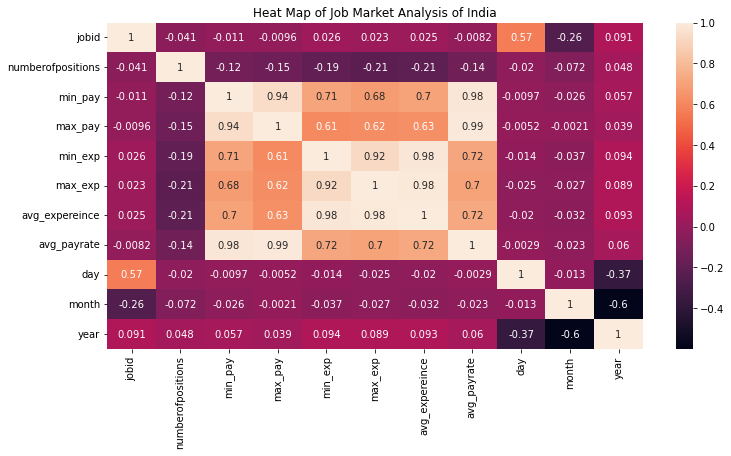

In [18]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot = True)
plt.title('Heat Map of Job Market Analysis of India')

In [19]:
df.corr()['min_pay']

jobid               -0.010856
numberofpositions   -0.121553
min_pay              1.000000
max_pay              0.938850
min_exp              0.709683
max_exp              0.677629
avg_expereince       0.704354
avg_payrate          0.979315
day                 -0.009659
month               -0.025859
year                 0.057210
Name: min_pay, dtype: float64

In [20]:
data = df.copy()

In [21]:
data.columns

Index(['company', 'education', 'industry', 'jobdescription', 'jobid',
       'joblocation_address', 'jobtitle', 'numberofpositions', 'site_name',
       'skills', 'min_pay', 'max_pay', 'min_exp', 'max_exp', 'avg_expereince',
       'avg_payrate', 'day', 'month', 'year'],
      dtype='object')

In [22]:
comp = data['company'].value_counts().reset_index()

In [23]:
comp.columns = ['company','Number of Jobs']

In [24]:
comp

,company,Number of Jobs
0,Indian Institute of Technology Bombay,403
1,Confidential,393
2,National Institute of Industrial Engineering,185
3,Oracle India Pvt. Ltd.,151
4,JPMorgan Chase,135
...,...,...
8464,Bello Jewels Pvt Ltd,1
8465,ITG Telematics Pvt Ltd,1
8466,Genuine Management Services Pvt. Limited hirin...,1
8467,AJAX Consulting hiring for a large Japanese MNC,1


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

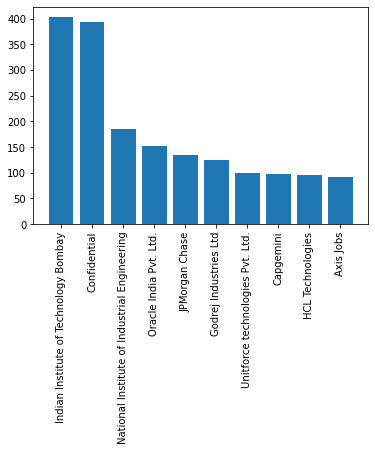

In [25]:
## Bar Chart

plt.bar(comp['company'][0:10],comp['Number of Jobs'][0:10])
plt.xticks(rotation = 'vertical')

(array([], dtype=float64), [])

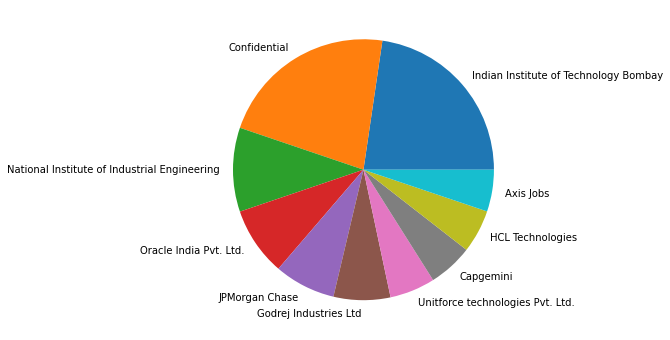

In [26]:
## Pie Chart
plt.figure(figsize=[12,6])
plt.pie(labels=comp['company'][0:10],x=comp['Number of Jobs'][0:10])
plt.xticks(rotation = 'vertical')

In [33]:
## Automate the code through Function

def perform_analysis(data,feature,col1,col2,chart=1):
    
    '''This will return us plots depending upon whatever chart we want
    
    Parameters
    -------
    
    data:dataframe 
    
    feature:column_name that we have to consider for analysis
    
    col1:1st column name that u want to assign to dataframe
    
    col2:2nd column name that u want to assign to dataframe
    
    @chart:if value of chart is 1 ,it represents bar chart
    @chart:if value of chart is 2 ,it represents pie chart
    
    '''

    
    dataframe = data[feature].value_counts().reset_index()
    dataframe.columns = [col1,col2]
    
    print(dataframe.head(5))
    
    if chart == 1:
        plt.bar(dataframe[col1][0:10],dataframe[col2][0:10])
        plt.xticks(rotation = 'vertical')
        
    elif chart == 2:
        plt.pie(labels=dataframe[col1][0:10],x=dataframe[col2][0:10])
        plt.xticks(rotation = 'vertical')


                                        company  Number of Jobs
0         Indian Institute of Technology Bombay             403
1                                  Confidential             393
2  National Institute of Industrial Engineering             185
3                        Oracle India Pvt. Ltd.             151
4                                JPMorgan Chase             135


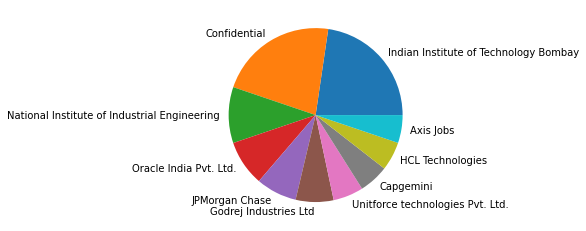

In [34]:
perform_analysis(data,'company','company','Number of Jobs',2)

In [29]:
## How to print the document of the function.
print(pd.read_csv.__doc__)


Read a comma-separated values (csv) file into DataFrame.

Also supports optionally iterating or breaking of the file
into chunks.

Additional help can be found in the online docs for
`IO Tools <https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html>`_.

Parameters
----------
filepath_or_buffer : str, path object or file-like object
    Any valid string path is acceptable. The string could be a URL. Valid
    URL schemes include http, ftp, s3, gs, and file. For file URLs, a host is
    expected. A local file could be: file://localhost/path/to/table.csv.

    If you want to pass in a path object, pandas accepts any ``os.PathLike``.

    By file-like object, we refer to objects with a ``read()`` method, such as
    a file handle (e.g. via builtin ``open`` function) or ``StringIO``.
sep : str, default ','
    Delimiter to use. If sep is None, the C engine cannot automatically detect
    the separator, but the Python parsing engine can, meaning the latter will
    be used and auto

In [30]:
print(perform_analysis.__doc__)

This will return us plots depending upon whatever chart we want
    
    Parameters
    -------
    
    data:dataframe 
    
    feature:column_name that we have to consider for analysis
    
    col1:1st column name that u want to assign to dataframe
    
    col2:2nd column name that u want to assign to dataframe
    
    @chart:if value of chart is 1 ,it represents bar chart
    @chart:if value of chart is 2 ,it represents pie chart
    
    


                               industries  no of jobs
0         IT-Software / Software Services        9216
1         Education / Teaching / Training        1322
2                BPO / Call Centre / ITES        1254
3  Banking / Financial Services / Broking        1238
4                  Recruitment / Staffing        1129


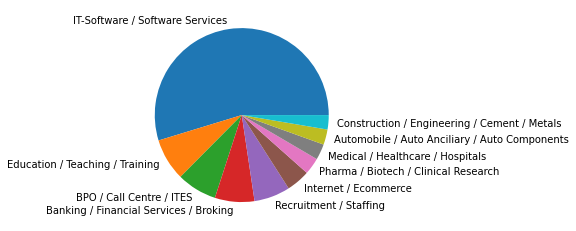

In [35]:
perform_analysis(data,'industry','industries','no of jobs',2)

                         jobtitle  no of jobs
0  Business Development Executive          93
1    Business Development Manager          92
2               Software Engineer          81
3                 Project Manager          67
4               Android Developer          65


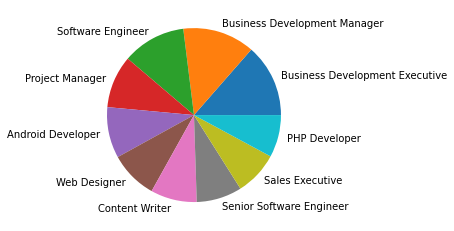

In [36]:
perform_analysis(data,'jobtitle','jobtitle','no of jobs',2)

                                  skills  no of jobs
0  IT Software - Application Programming        5989
1                                  Sales        2893
2                                   ITES        1640
3                               Teaching        1091
4                                     HR         928


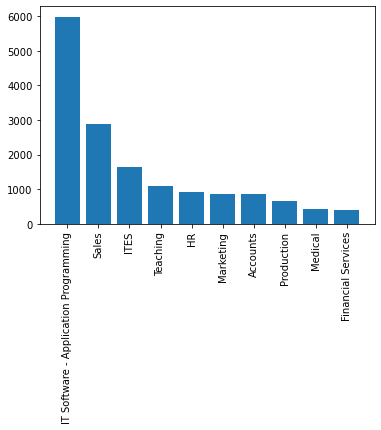

In [37]:
perform_analysis(data,'skills','skills','no of jobs')

        city  job count
0  Bangalore       5228
1     Mumbai       2887
2      Delhi       2741
3  Hyderabad       2182
4    Chennai       1204


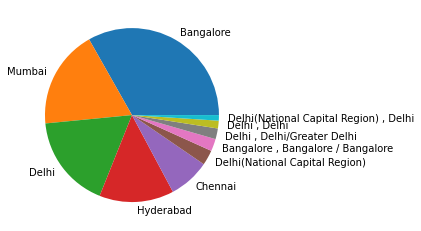

In [39]:
perform_analysis(data,'joblocation_address','city','job count',2)